In [1]:
!pip install yfinance scikit-learn matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 1.5 MB/s eta 0:00:02
     ------------- -------------------------- 1.0/3.0 MB 1.4 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.3 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.3 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.3 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 1.3 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.2 MB/s eta 0:00:01
     ------------------------------- -------- 2.4/3.0 MB 1.2 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 1.2 MB/s eta 0:00:01
     --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('Apple Dataset.csv')

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [6]:
df = dataset[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
df = df.dropna()

In [7]:
df['Next_Close'] = df['Close'].shift(-1)
df = df.dropna()

In [8]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)


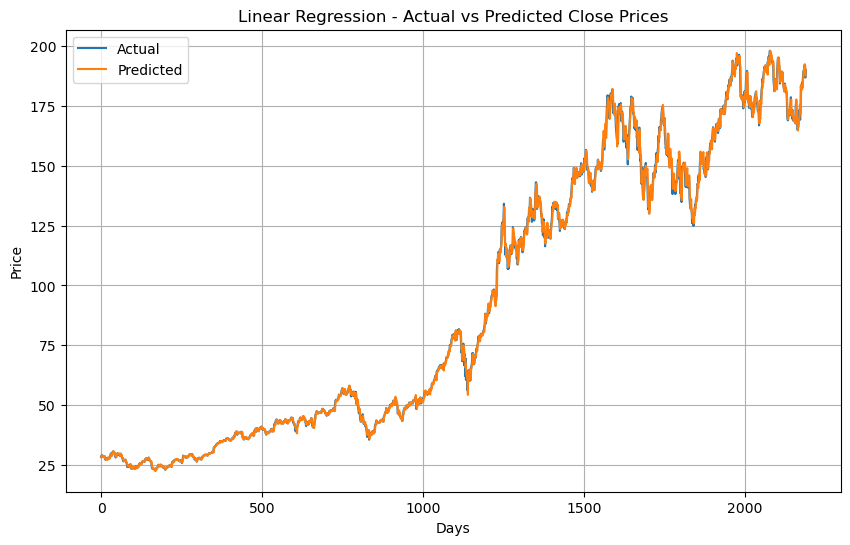

Linear Regression R²: 0.9988271197125926


In [16]:
def plot_predictions(y_test, predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual')
    plt.plot(predictions, label='Predicted')
    plt.title(f'{model_name} - Actual vs Predicted Close Prices')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()
# Linear Regression Plot
plot_predictions(y_test, preds, "Linear Regression")
# Metrics
print("Linear Regression R²:", r2_score(y_test, preds))